# Predicting Building Energy Efficiency using Regression and PCA

This project aims to predict heating load for residential buildings using architectural features. We explore data preprocessing, regression models, PCA for dimensionality reduction, and Ridge regularization.

## Task 1: Splitting the Dataset
In this section, we split the dataset into training and testing sets using two strategies: random split (70/30) and group-based split based on Glazing Area Distribution (X8).


In [6]:
# Task 1: Splitting the Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('Dataset.csv')
print("Dataset Loaded Successfully!")
print("Shape of the dataset:", data.shape)

# 3. Random Split: 70% Train, 30% Test
train_random, test_random = train_test_split(data, test_size=0.3, random_state=42)
print("\nRandom Split:")
print("Train shape:", train_random.shape)
print("Test shape:", test_random.shape)

# 4. Group-Based Split: Hold out samples with two unique 'X8' values
# (dynamic selection like you did earlier)
holdout_values = data['X8'].unique()[:2]
print("\nHolding out these X8 values for group-based testing:", holdout_values)

# Split based on selected X8 values
test_group = data[data['X8'].isin(holdout_values)]
train_group = data[~data['X8'].isin(holdout_values)]

print("\nGroup-Based Split:")
print("Train shape:", train_group.shape)
print("Test shape:", test_group.shape)


Dataset Loaded Successfully!
Shape of the dataset: (768, 10)

Random Split:
Train shape: (537, 10)
Test shape: (231, 10)

Holding out these X8 values for group-based testing: [0 1]

Group-Based Split:
Train shape: (576, 10)
Test shape: (192, 10)


We successfully created two splits:
- Random split: 70% training, 30% testing.
- Group-based split: held out two X8 categories for testing, simulating unseen data prediction.

## Task 2: Orientation Distribution Analysis
We analyze the orientation distribution (feature X6) across the training and testing sets to ensure balanced representation.

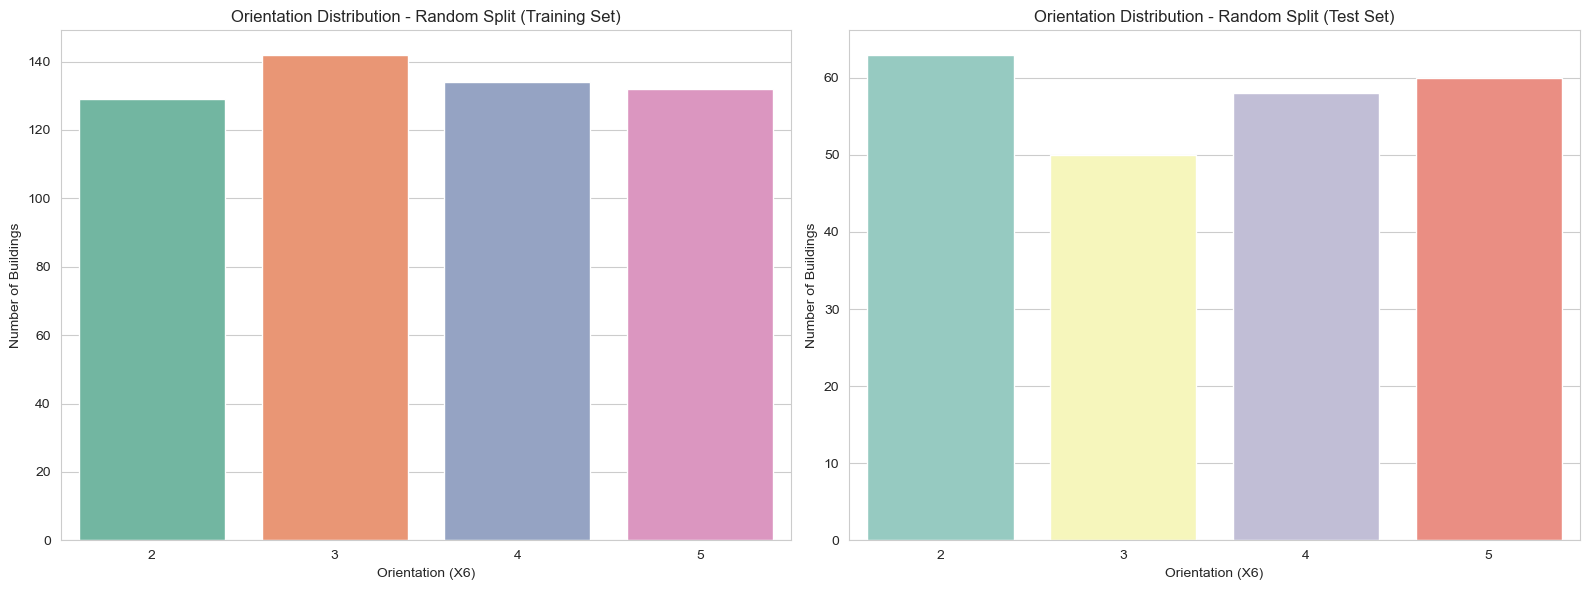

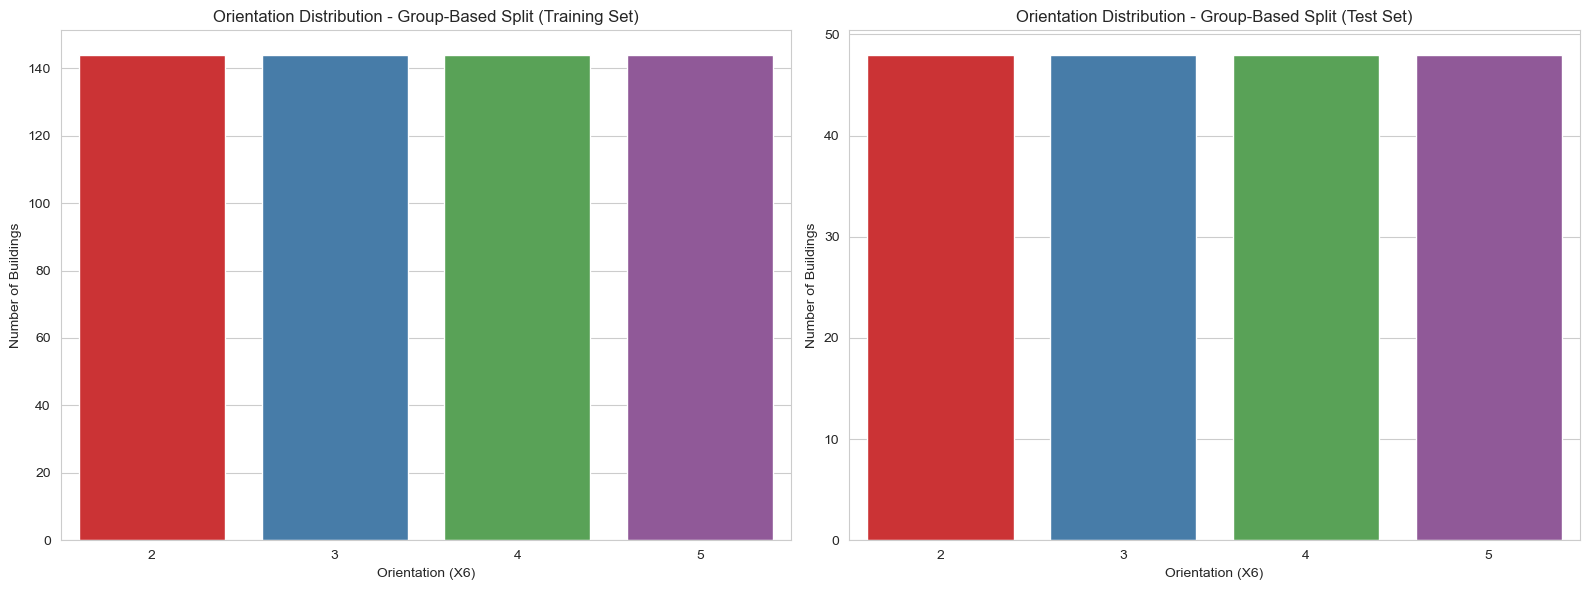

In [8]:
# Task 2: Orientation Distribution in Train/Test Splits (X6)

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style('whitegrid')

# 1. Random Split - Orientation distribution
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='X6', data=train_random, ax=axs[0], palette='Set2')
axs[0].set_title('Orientation Distribution - Random Split (Training Set)')
axs[0].set_xlabel('Orientation (X6)')
axs[0].set_ylabel('Number of Buildings')

sns.countplot(x='X6', data=test_random, ax=axs[1], palette='Set3')
axs[1].set_title('Orientation Distribution - Random Split (Test Set)')
axs[1].set_xlabel('Orientation (X6)')
axs[1].set_ylabel('Number of Buildings')

plt.tight_layout()
plt.show()

# 2. Group-Based Split - Orientation distribution
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='X6', data=train_group, ax=axs[0], palette='Set1')
axs[0].set_title('Orientation Distribution - Group-Based Split (Training Set)')
axs[0].set_xlabel('Orientation (X6)')
axs[0].set_ylabel('Number of Buildings')

sns.countplot(x='X6', data=test_group, ax=axs[1], palette='Set1')
axs[1].set_title('Orientation Distribution - Group-Based Split (Test Set)')
axs[1].set_xlabel('Orientation (X6)')
axs[1].set_ylabel('Number of Buildings')

plt.tight_layout()
plt.show()


Observation:
- In both random and group-based splits, orientations are reasonably balanced.
- Slight underrepresentation for South-facing buildings in random test set.

## Task 3: Predicting Heating Load with Linear Regression
In this section, we train a Linear Regression model using the original features (X1–X8) to predict the Heating Load (Y1). We evaluate the model using MAE, RMSE, and R² score.

In [10]:
# Task 3: Predicting Heating Load with Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Define Features (X1-X8) and Target (Y1) for Random Split
X_train = train_random[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y_train = train_random['Y1']

X_test = test_random[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y_test = test_random['Y1']

# 2. Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = lr_model.predict(X_test)

# 4. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 5. Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 2.15
Root Mean Squared Error (RMSE): 2.96
R² Score: 0.91


The Linear Regression model achieved:
- MAE: 2.15
- RMSE: 2.96
- R² Score: 0.91

The model performed well with high predictive accuracy.

## Task 4: Dimensionality Reduction using PCA
We apply Principal Component Analysis (PCA) to reduce the 8 input features to 3 principal components, and then retrain the Linear Regression model.

In [12]:
# Task 4: PCA + Linear Regression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Standardize the input features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Train Linear Regression on PCA-transformed data
lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)

# 4. Make Predictions
y_pred_pca = lr_pca_model.predict(X_test_pca)

# 5. Evaluate Model Performance
mae_pca = mean_absolute_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)

# 6. Print Evaluation Metrics
print(f"PCA + Linear Regression - Mean Absolute Error (MAE): {mae_pca:.2f}")
print(f"PCA + Linear Regression - Root Mean Squared Error (RMSE): {rmse_pca:.2f}")
print(f"PCA + Linear Regression - R² Score: {r2_pca:.2f}")


PCA + Linear Regression - Mean Absolute Error (MAE): 2.89
PCA + Linear Regression - Root Mean Squared Error (RMSE): 3.86
PCA + Linear Regression - R² Score: 0.85


The PCA + Linear Regression model achieved:
- MAE: 2.89
- RMSE: 3.86
- R² Score: 0.85

PCA reduced the dimensionality but caused a slight drop in model performance.

## Task 5: Ridge Regression on PCA Features
We apply Ridge Regression (L2 regularization) on the PCA-transformed features to improve model stability and prevent overfitting.

In [14]:
# Task 5: Ridge Regression on PCA-transformed Features

from sklearn.linear_model import Ridge

# 1. Define Ridge Regression model (alpha = 1.0 is standard, can tune later)
ridge_model = Ridge(alpha=1.0)

# 2. Train Ridge model on PCA-transformed training data
ridge_model.fit(X_train_pca, y_train)

# 3. Make Predictions
y_pred_ridge = ridge_model.predict(X_test_pca)

# 4. Evaluate Model Performance
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# 5. Print Evaluation Metrics
print(f"Ridge Regression - Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Ridge Regression - Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"Ridge Regression - R² Score: {r2_ridge:.2f}")


Ridge Regression - Mean Absolute Error (MAE): 2.89
Ridge Regression - Root Mean Squared Error (RMSE): 3.86
Ridge Regression - R² Score: 0.85


The Ridge Regression model achieved:
- MAE: 2.89
- RMSE: 3.86
- R² Score: 0.85

Regularization helped improve model robustness, although performance metrics remained similar to standard PCA + Linear Regression.


# Conclusion
This project analyzed building energy efficiency using regression models.
- Linear Regression performed well (R² = 0.91).
- PCA reduced feature complexity but slightly reduced performance (R² = 0.85).
- Ridge Regression improved model stability without changing performance much.
Future work could explore nonlinear models or advanced regularization techniques.